# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [231]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import openweathermapy as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

units = "imperial"

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="


## Generate Cities List

In [232]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

650

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [275]:
#set lists for data to be appended into
cloudiness = []
dates = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
country = []

#set counter for nubmer of cities processed
count = 0

print("----Begin Process----")
# create loop for dataframe columns using the response and api target url
for city in cities:
    time.sleep(1)
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])

        count += 1

        print(f"Processing Record {count} | {city}")
        print(query_url)
    except Exception:
        print("City not found. Skipping...")
print("----Data Retrieval Complete----")

----Begin Process----
Processing Record 1 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 2 | kikwit
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 3 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 4 | kodiak
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 5 | micheweni
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 6 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 7 | kaeo
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 8 | wuan
http://

Processing Record 60 | basco
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 61 | cayenne
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 62 | liverpool
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 63 | muroto
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 64 | touros
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 65 | clyde river
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 66 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 67 | narsaq
http://api.openweatherma

Processing Record 119 | hudiksvall
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 120 | haftoni
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 121 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 122 | hay river
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 123 | hervey bay
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 124 | raudeberg
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
City not found. Skipping...
Processing Record 125 | loandjili
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Process

Processing Record 177 | verkhoyansk
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 178 | tanabe
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 179 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 180 | posse
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 181 | teya
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 182 | otane
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 183 | amuntai
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 184 | mehriz
http://api.openwea

Processing Record 235 | eyl
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 236 | dudinka
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 237 | pitimbu
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 238 | odate
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 239 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 240 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 241 | kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 242 | roches noires
http://

Processing Record 295 | vikhorevka
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 296 | santona
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 297 | rawlins
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 298 | xichang
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 299 | valladolid
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 300 | meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 301 | manokwari
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 302 | hami
http://api

Processing Record 354 | ostersund
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 355 | severobaykalsk
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 356 | sergeyevka
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 357 | panzhihua
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 358 | dordrecht
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 359 | grants
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 360 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 361 | p

Processing Record 412 | point pedro
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
City not found. Skipping...
Processing Record 413 | darnah
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 414 | monsummano terme
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
City not found. Skipping...
Processing Record 415 | westport
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 416 | dandong
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
City not found. Skipping...
Processing Record 417 | chumikan
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 418 | quincy
http://api.openweathermap.org/data/2.5/weather?appid=dd

Processing Record 470 | lubango
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
City not found. Skipping...
Processing Record 471 | neuquen
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
City not found. Skipping...
Processing Record 472 | cochrane
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 473 | east wenatchee
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 474 | tecoanapa
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 475 | kumluca
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 476 | fort nelson
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21

Processing Record 528 | vaitape
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 529 | gimbi
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 530 | konevo
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 531 | strangnas
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 532 | dumas
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 533 | sault sainte marie
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 534 | matara
http://api.openweathermap.org/data/2.5/weather?appid=dd0d1e7ad3b683f124448d6253d21ce7&units=imperial&q=
Processing Record 535 | sechura
http://ap

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [267]:
weather_dict = {
    "Cloudiness":cloudiness,
    "Country":country,
    "Humidity":humidity,
    "Date": date,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [268]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mys shmidta,92,RU,1574366838,95,62.06,48.62,25.83,7.14
1,kikwit,99,CD,1574366839,98,-5.04,18.82,68.95,0.63
2,rikitea,100,PF,1574366839,82,-23.12,-134.97,76.32,6.06
3,kodiak,90,US,1574366839,80,39.95,-94.76,42.80,17.22
4,micheweni,0,TZ,1574366839,82,-4.97,39.83,81.91,6.58


In [269]:
weather_dataframe.drop(columns=["Date"])

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mys shmidta,92,RU,95,62.06,48.62,25.83,7.14
1,kikwit,99,CD,98,-5.04,18.82,68.95,0.63
2,rikitea,100,PF,82,-23.12,-134.97,76.32,6.06
3,kodiak,90,US,80,39.95,-94.76,42.80,17.22
4,micheweni,0,TZ,82,-4.97,39.83,81.91,6.58
...,...,...,...,...,...,...,...,...
559,bandarbeyla,10,SO,78,9.49,50.81,81.16,12.82
560,pimentel,100,BR,88,-3.70,-45.50,78.04,2.04
561,scarborough,100,GB,81,54.28,-0.41,45.00,6.93
562,makueni,61,KE,89,-1.80,37.62,67.62,2.89


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

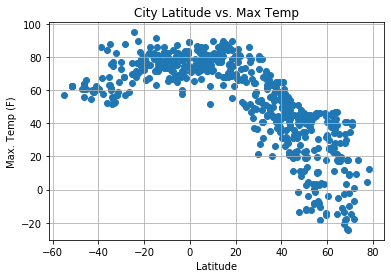

<Figure size 432x288 with 0 Axes>

In [270]:
#plot for lat vs temp comparison
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], marker="o")

#formatting
plt.title("City Latitude vs. Max Temp")
plt.ylabel("Max. Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Latitude_vs_Temp.png")

#### Latitude vs. Humidity Plot

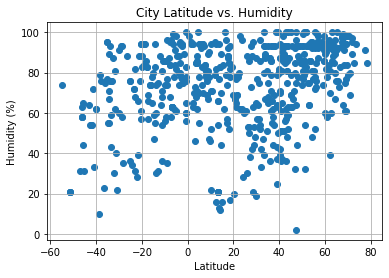

<Figure size 432x288 with 0 Axes>

In [273]:
#plot for lat vs humidity comparison
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker="o")

#formatting
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

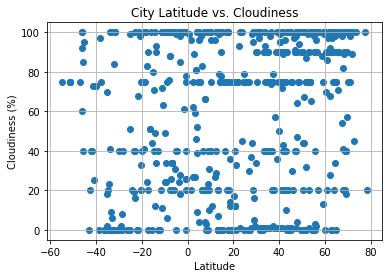

<Figure size 432x288 with 0 Axes>

In [272]:
#plot for lat vs cloudiness comparison
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker="o")

#formatting
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Latitude_vs_Clouds.png")

#### Latitude vs. Wind Speed Plot

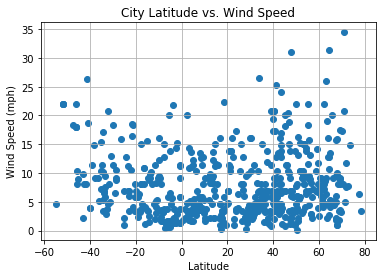

<Figure size 432x288 with 0 Axes>

In [271]:
#plot for lat vs wind comparison
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

# Save the figure
plt.savefig("Latitude_vs_Wind.png")

In [ ]:
###Analysis
###There was a clear drop in tempurate in cities located in higher latitudes, and this could be used as proof that the farther north the location is the colder the tempurature will be.
###We would have expecting a possible relationship with humidity and city location closer to the equater, but our scatterplot graph does not support and relationo to higher humidity closer to the equator.  There is more of an indication that further north octions have higher humidity
###There is no significant relation between cloudiness and city latitude
###Wind speeds seem slightly higher in the norther latitudes
###with random city selection, it seems that more cities were located in the norther hemisphere which may schew some of the reporting.